In [76]:
#import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

%matplotlib inline

In [77]:
# 데이터 준비
data = pd.read_csv('KR_youtube_trending_data.csv', encoding='utf-8')
data.trending_date=pd.to_datetime(data.trending_date, format='%Y-%m-%d')
z = data['trending_date'].values

# 원하는 데이터만 남겨두고 drop하기
data.drop('video_id', axis = 1, inplace=True)
data.drop('title', axis = 1, inplace=True)
data.drop('channelId', axis = 1, inplace=True)
data.drop('channelTitle', axis = 1, inplace=True)
data.drop('tags', axis = 1, inplace=True)
data.drop('thumbnail_link', axis = 1, inplace=True)
data.drop('comments_disabled', axis = 1, inplace=True)
data.drop('ratings_disabled', axis = 1, inplace=True)
data.drop('description', axis = 1, inplace=True)
data.drop('publishedAt', axis = 1, inplace=True)
data.drop('trending_date', axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82954 entries, 0 to 82953
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   categoryId     82954 non-null  int64
 1   view_count     82954 non-null  int64
 2   likes          82954 non-null  int64
 3   dislikes       82954 non-null  int64
 4   comment_count  82954 non-null  int64
dtypes: int64(5)
memory usage: 3.2 MB


In [78]:
scaler = StandardScaler()
output = scaler.fit_transform(data)

In [79]:
x = data.drop(['view_count'], axis=1).values # 독립변인들의 value값만 추출
y = data['view_count'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['categoryId', 'likes','dislikes','comment_count']
target_features = ['view_count']
x_df = pd.DataFrame(x, columns=features)
x_df.head(10)

,categoryId,likes,dislikes,comment_count
0,0.555828,-0.056229,8.489251,0.918502
1,-3.031093,-0.106503,-0.065881,-0.056378
2,0.243922,-0.127088,5.493630,0.281522
3,0.555828,-0.089167,0.040101,-0.017756
4,-1.627515,0.545101,0.687453,0.086820
5,-1.627515,1.268603,1.127393,0.141307
6,-3.031093,-0.149771,-0.074090,-0.074255
7,0.555828,-0.136977,0.977929,0.050289
8,0.399875,-0.136725,-0.078560,-0.039551
9,0.399875,-0.140815,-0.097660,-0.063622


In [80]:
x_df.shape

(82954, 4)

In [81]:
y_df = pd.DataFrame(y, columns=target_features)
y_df.head(10)

,view_count
0,5947503
1,963384
2,2950885
3,1743374
4,3433885
5,6000070
6,690331
7,659743
8,340149
9,351264


In [82]:
X_cen  = x_df - x_df.mean(axis = 0)

In [83]:
X_cov = np.dot(x_df.T, X_cen) / 82953
print(X_cov)

[[ 1.00001206 -0.16133898 -0.07812067 -0.09200739]
 [-0.16133898  1.00001206  0.67947072  0.83948704]
 [-0.07812067  0.67947072  1.00001206  0.65081259]
 [-0.09200739  0.83948704  0.65081259  1.00001206]]


In [84]:
w, v = np.linalg.eig(X_cov)
print('eigenvalue :', w) # 고유값
print('eigenvector :\n', v) # 고유벡터


eigenvalue : [2.47514869 0.97913066 0.15614619 0.38962269]
eigenvector :
 [[ 0.12988046 -0.98854154 -0.06093414  0.0469439 ]
 [-0.59416648 -0.01725522 -0.73475957  0.32679785]
 [-0.53804416 -0.11438411  0.06756058 -0.83238232]
 [-0.58361437 -0.09697508  0.67219862  0.4451282 ]]


In [85]:
# 고유값 비율
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.61877971 0.24477971 0.03903608 0.0974045 ]


In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(x_df)

PCA(n_components=4)

In [87]:
data_scale = pd.DataFrame(x_df, columns=x_df.columns, index = x_df.index)
# PCA 주성분분석
pca = PCA(random_state=0)
X_p = pca.fit_transform(data_scale)
pd.Series(np.cumsum(pca.explained_variance_ratio_))

# 3개의 고유값으로 96%의 분산량을 설명할 수 있다.

0    0.618780
1    0.863559
2    0.960964
3    1.000000
dtype: float64

In [88]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.17, random_state = 1)

pca = PCA(n_components=3)

#1. LinearRegression
lr = LinearRegression()
pipe = Pipeline([('pca', pca), ('linear', lr)])
#2. Lasso
lasso_reg = Lasso(alpha = 0.1, random_state =1)
pipe_lasso = Pipeline([('pca', pca), ('fit', lasso_reg)])
#3. ElasticNet
el_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state =  1)
pipe_el = Pipeline([('pca', pca), ('fit', el_reg)])


In [89]:
# Linear_Regression
# Linear_Regression의 score(R-squared)값은 0.85
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.8539275991819452

In [90]:
# Linear_Regression의 MSE score 값은 0.83
pipe.fit(X_test, y_test)
pipe.score(X_test, y_test)

0.8370045381042113

In [91]:
# Linear_Regression을 활용한 예상 조회수 = 825808
from sklearn import metrics

y_pred=pipe.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

825808.7875166024

In [92]:
# Lasso_Regression
# Lasso_Regression의 score(R-squared)값은 0.85
pipe_lasso.fit(X_train, y_train)
pipe_lasso.score(X_train, y_train)

0.8539275991819445

In [93]:
# Lasso_Regression의 MSE score 값은 0.83
pipe_lasso.fit(X_test, y_test)
pipe_lasso.score(X_test, y_test)

0.8370045381042096

In [94]:
# Lasso_Regression을 활용한 예상 조회수 = 825808
from sklearn import metrics

y_pred=pipe_lasso.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

825808.7938781326

In [95]:
# ElasticeNet_Regression
# ElasticeNet_Regression의 score(R-squared)값은 0.85
pipe_el.fit(X_train, y_train)
pipe_el.score(X_train, y_train)

0.8533964615013345

In [96]:
# ElasticeNet_Regression의 MSE score 값은 0.83
pipe_el.fit(X_test, y_test)
pipe_el.score(X_test, y_test)

0.8361273102241578

In [97]:
# ElasticeNet_Regression을 활용한 예상 조회수 = 833191
from sklearn import metrics

y_pred=pipe_el.predict(X_test)
metrics.mean_absolute_error(y_test,y_pred)

833191.3936135924

Text(0.5, 1.0, 'view_count vs linear Predicted view_count: $Y_i$ vs $\\hat{Y}_i$')

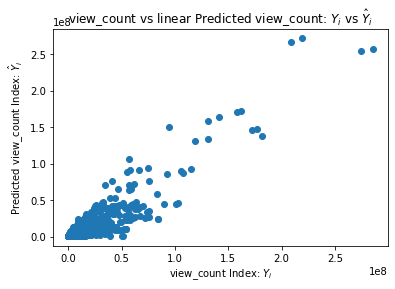

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt


Y_pred = pipe.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("view_count Index: $Y_i$")
plt.ylabel("Predicted view_count Index: $\hat{Y}_i$")
plt.title("view_count vs linear Predicted view_count: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'view_count vs Lasso Predicted view_count: $Y_i$ vs $\\hat{Y}_i$')

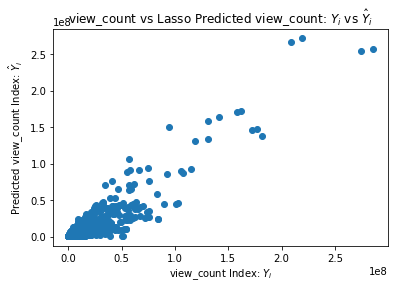

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

Y_pred = pipe_lasso.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("view_count Index: $Y_i$")
plt.ylabel("Predicted view_count Index: $\hat{Y}_i$")
plt.title("view_count vs Lasso Predicted view_count: $Y_i$ vs $\hat{Y}_i$")

Text(0.5, 1.0, 'view_count vs ElasticeNet Predicted view_count: $Y_i$ vs $\\hat{Y}_i$')

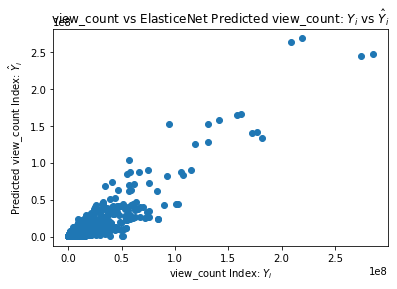

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt


Y_pred = pipe_el.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("view_count Index: $Y_i$")
plt.ylabel("Predicted view_count Index: $\hat{Y}_i$")
plt.title("view_count vs ElasticeNet Predicted view_count: $Y_i$ vs $\hat{Y}_i$")